In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
import xarray as xr
import numpy as np
import os
import datetime
import shutil
import glob
import calendar

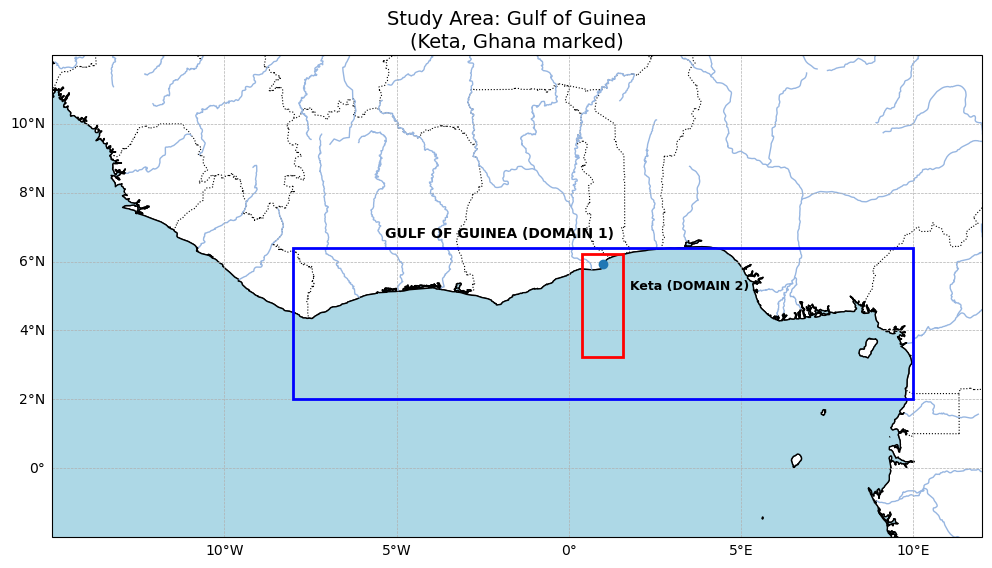

In [3]:


# --- Coordinates / domains ---
# Keta (center point)
keta_lon, keta_lat = 0.98789, 5.91793

# Overall map extent (choose to show wider west Africa including the Gulf of Guinea)
lon_min, lon_max = -15, 12
lat_min, lat_max = -2, 12

# Gulf of Guinea bounding box (used for the "DOMAIN 1" rectangle)
gulf_lon_min, gulf_lon_max = -8.0, 10.0   # degrees east (west is negative)
gulf_lat_min, gulf_lat_max = 2.0, 6.4    # degrees north (south is negative)

# DOMAIN 2 small box around Keta (a small coastal box to show as DOMAIN 2)
keta_box_half_width = 0.6   # degrees (approx ~60 km at equator per 1 deg)
keta_box_half_height = 1.5  # degrees (elongated toward sea if desired)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})

# IMPORTANT: set_extent expects [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add background features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
#ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
# Note: cfeature.STATES exists for some Natural Earth datasets, keep if available
# try:
#     ax.add_feature(cfeature.STATES, linewidth=0.5)
# except Exception:
#     pass
# ax.add_feature(cfeature.RIVERS)

# Gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.top_labels = False
gl.right_labels = False

# Draw Gulf of Guinea rectangle (DOMAIN 1)
gulf_width = gulf_lon_max - gulf_lon_min
gulf_height = gulf_lat_max - gulf_lat_min
from matplotlib.patches import Rectangle
gulf_rect = Rectangle((gulf_lon_min, gulf_lat_min),
                      gulf_width, gulf_height,
                      linewidth=2, edgecolor='blue', facecolor='none',
                      transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(gulf_rect)

# Draw Keta (DOMAIN 2) small rectangle centered on keta coordinates
shift_down = 1.2   # you can tweak this (e.g., 0.3, 0.7)

keta_rect = Rectangle((keta_lon - keta_box_half_width,
                       (keta_lat - keta_box_half_height) - shift_down),
                      2 * keta_box_half_width,
                      2 * keta_box_half_height,
                      linewidth=2, edgecolor='red', facecolor='none',
                      transform=ccrs.PlateCarree(), zorder=4)

ax.add_patch(keta_rect)

# Mark Keta with a dot and label
ax.plot(keta_lon, keta_lat, marker='o', markersize=6,
        transform=ccrs.PlateCarree(), zorder=5)
ax.text(3.5, 5.2, 'Keta (DOMAIN 2)', fontsize=9,
        transform=ccrs.PlateCarree(), ha='center', fontweight='bold')

# Keta (5.9179°N, 0.9879°E)
# Label the Gulf box
gulf_label_x = (gulf_lon_min + gulf_lon_max) / 2
gulf_label_y = gulf_lat_min + gulf_height * 0.7
ax.text(-2, 6.7, 'GULF OF GUINEA (DOMAIN 1)', fontsize=10,
        transform=ccrs.PlateCarree(), ha='center', fontweight='bold')
# ax.text(-7, gulf_lat_min + 4.5, 'DOMAIN 1 (Gulf of Guinea)', color='black', fontsize=10, fontweight='bold',
#         transform=ccrs.PlateCarree(), ha='center')

# Title
plt.title('Study Area: Gulf of Guinea\n(Keta, Ghana marked)', fontsize=14)
plt.savefig("figures/study_area.png", format="png", bbox_inches="tight")

plt.show()


Text(0.5, 1.0, 'Study Area: Gulf of Guinea\n(Keta, Ghana Marked)')

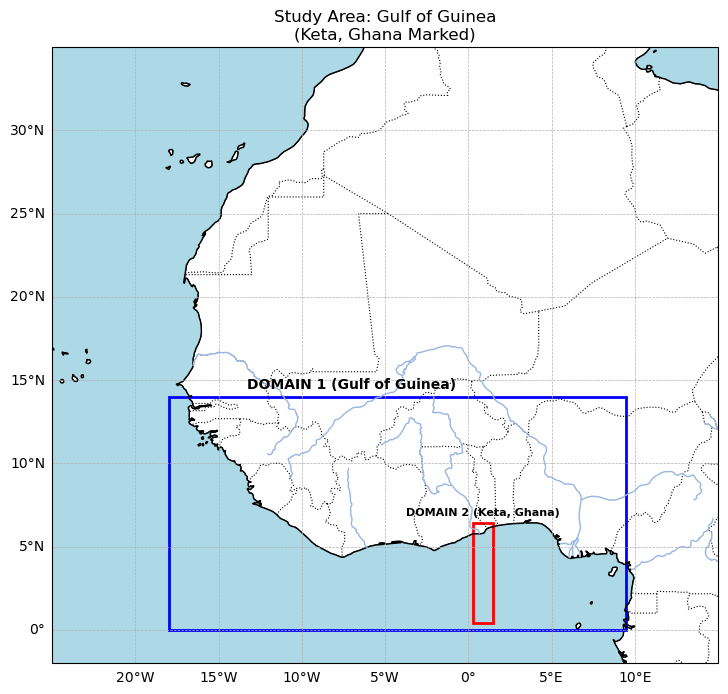

In [5]:
# # Define study area boundaries (Gulf of Guinea)
# lon_min, lon_max = -10, 10   # Longitude range
# lat_min, lat_max = 0, 10    # Latitude range
# keta_lon, keta_lat = 0.9, 5.9


# Define study area boundaries (Gulf of Guinea)
lon_min, lon_max = -25, 15   # Longitude range
lat_min, lat_max = -2, 35    # Latitude range
keta_lon, keta_lat = 0.9, 3.4
gulf_lon_max, gulf_lon_min = -8, 10
gulf_lat_max, gulf_lat_min = 0, 10 

fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={"projection":ccrs.PlateCarree()})
ax.set_extent([lon_max, lon_min, lat_max, lat_min], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)


# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.right_labels = False
gl.top_labels = False

# Mark gulf with a red box
box_size_h = 27.5  # Define box size in degrees
box_size_w = 14
rect = plt.Rectangle((gulf_lon_max - gulf_lon_min, gulf_lat_min - gulf_lat_min), 
                     box_size_h, box_size_w, 
                     linewidth=2, edgecolor='blue', facecolor='none',
                     transform=ccrs.PlateCarree())
ax.add_patch(rect)
# box_size = 0.5
# rect2 = plt.Rectangle((keta_lon - box_size/2, keta_lat - box_size/2),
#                       box_size, box_size,
#                       linewidth=2, edgecolor="red", facecolor="none",
#                       transform = ccrs.PlateCarree()) 
# ax.add_patch(rect2)


extended_box_size_h = 6.0  # Increase height to extend towards the sea
extended_box_size_w = 1.2   # Increase width to extend towards the sea

# Create the extended rectangle
rect2 = plt.Rectangle((keta_lon - extended_box_size_w / 2, keta_lat - extended_box_size_h / 2),
                      extended_box_size_w, extended_box_size_h,
                      linewidth=2, edgecolor="red", facecolor="none",
                      transform=ccrs.PlateCarree()) 
ax.add_patch(rect2)

# # Add text label for Accra

ax.text(keta_lon, keta_lat + 3.5, 'DOMAIN 2 (Keta, Ghana)', color='black', fontsize=8, fontweight='bold',
        transform=ccrs.PlateCarree(), ha='center')

ax.text(-7, gulf_lat_min + 4.5, 'DOMAIN 1 (Gulf of Guinea)', color='black', fontsize=10, fontweight='bold',
        transform=ccrs.PlateCarree(), ha='center')

# Title
plt.title('Study Area: Gulf of Guinea\n(Keta, Ghana Marked)', fontsize=12)

#plt.savefig("study_area.png")
#plt.savefig("study_area.svg", format="svg", bbox_inches="tight")


